In [1]:
import numpy as np # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
import matplotlib.transforms as transform                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im, HTML as hm # displaying LaTeX code in code cells

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 15,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (10,6),
                    })

plt.rcParams['axes.facecolor'] = 'black' 
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'
plt.rcParams['axes.titlepad'] = 20
legendfontsize=12

ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

#  Semiconductor Diodes

Group #13

NG Kuok Fung | #3797903 

Edgar Harutyunyan | #3775171

**Overview of Tasks**

***Task 1***

Measure the current-voltage characteristics of a Si diode, a Zener diode and a light-emitting-diode (LED). Plot the current-voltage characteristics in one diagram.

***Task 2***

- For the Si diode, determine the emission coefficient by linear regression in the $log(I)-U$ diagram.
- For the Zener diode, determine the breakdown voltage as well as the direct current resistance R and the differential resistance $r_d$ for a current of $0.2 I_{Z,max}$. 
- For the LED determine the threshold voltage by regression of the linear part of the current-voltage characteristic. From the threshold voltage estimate the average emitted wavelength and compare the result with your observations.

***Task 3***

Measure the junction capacitance of a Si power diode as a function of the reverse bias voltage using a resonance technique. Determine the thickness of the depletion layer for vanishing reverse bias voltage.


In [2]:
# GLOBALS
R_v = 1000 # Ohm
R_m = 100 # Ohm
L = 220 * 1e-3 # H
A = 25 * 1e-6 # m2
eps_r = 11.8
eps_0 = 8.854 * 1e-12 # F/m
T = 293.15 # Kelvin
e = 1.602176634*1e-19 # C
k_B = 1.380649*1e-23 # J / K
U_T = k_B*T/e # V
h = 6.62607015*1e-34 # J s
c = 299792458 # m/s

data_dir='./data/'
data_str_1 = 'a_Si_diode'
data_str_2_1 = 'b1_Zener_diode_forward'
data_str_2_2 = 'b2_Zener_diode_reverse'
data_str_3 = 'c_LED_2'

## Task 1

### Measurements

***Task Definition*** 

Measure the current-voltage characteristics of a Si diode, a Zener diode and a light-emitting-diode (LED). Plot the current-voltage characteristics in one diagram.

***Procedure*** 

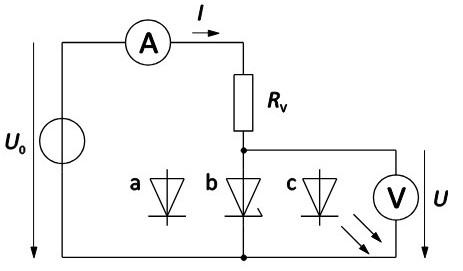

<IPython.core.display.Latex object>

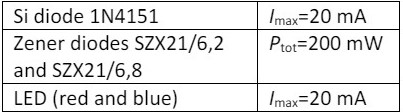

<IPython.core.display.Latex object>

In [3]:
dy(Im("./img/T1a.jpg", height=100, width=500))
dy(Lx(r'$Figure\, 1.1$: Diode Circuit Diagram. $^{[1]}$'))

dy(Im("./img/T1b.jpg", height=100, width=500))
dy(Lx(r'$Figure\, 1.2$: Power Ratings. $^{[1]}$'))

1. The circuit was set up following the circuit diagram, and care was taken to ensure that the power ratings of each diode were not exceeded. **Fig 1.1 & 1.2**
</br>

2. Measurements were taken using the provided software at an average sampling rate (SPA) of 5 samples per second. 
</br>

3. The Si diode and LED were measured in the forward bias direction, whereas the Zener diode was measured in both directions.
</br>

4. Subsequently, the I(U) graphs of each respective diode was plotted.

In [4]:
# import the data
col_names = ['I (A)', 'U (V)']
df_a = pd.read_csv(data_dir + data_str_1, usecols=col_names, dtype=np.float64, sep='\t', decimal=',')
df_bf = pd.read_csv(data_dir + data_str_2_1, usecols=col_names, dtype=np.float64, sep='\t', decimal=',')
df_br = pd.read_csv(data_dir + data_str_2_2, usecols=col_names, dtype=np.float64, sep='\t', decimal=',')
# mirroring reversed biased data to concatenate with forward biased
df_br['I (A)'] *= -1
df_br['U (V)'] *= -1
df_br = df_br.loc[::-1] # reverse the order
ind = df_bf[df_bf['I (A)'] > 0.06*1e-3].first_valid_index()
df_b = pd.concat([df_br, df_bf[:ind]], ignore_index=True) # concat

df_c = pd.read_csv(data_dir + data_str_3, usecols=col_names, dtype=np.float64, sep='\t', decimal=',')
# list of all 3 diode datas
df_l = [df_a,df_b, df_c]
df_l_titles = ['Si diode', 'Zener diode', 'LED']

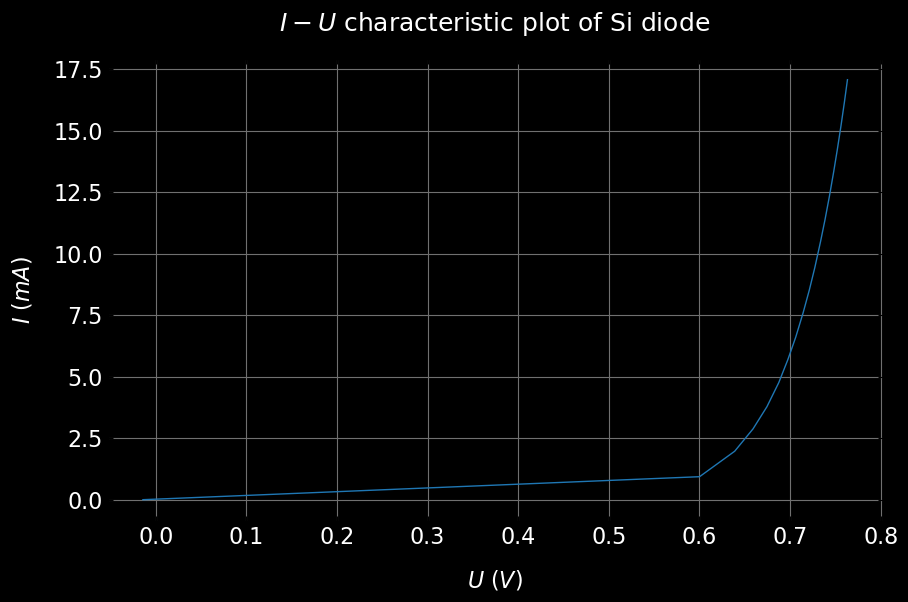

<IPython.core.display.Latex object>

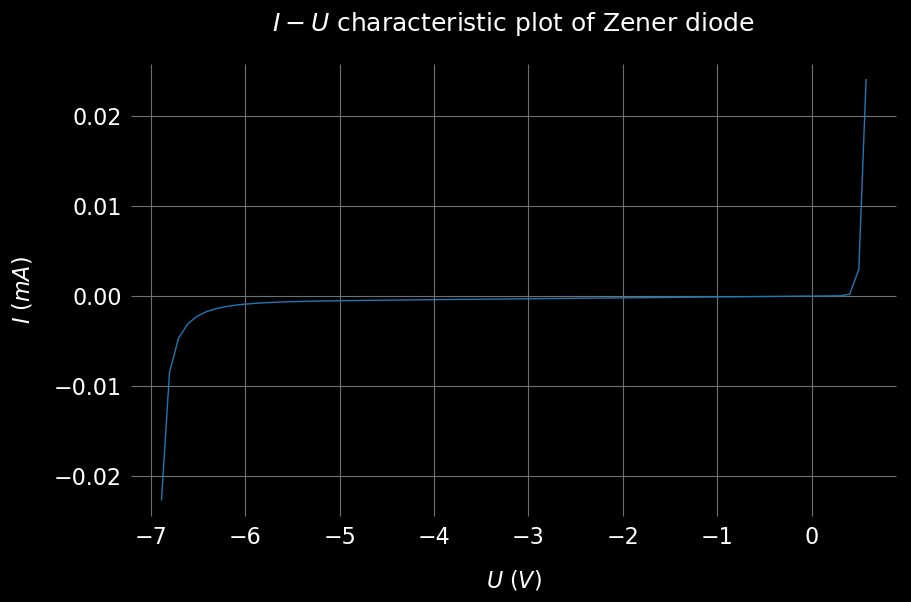

<IPython.core.display.Latex object>

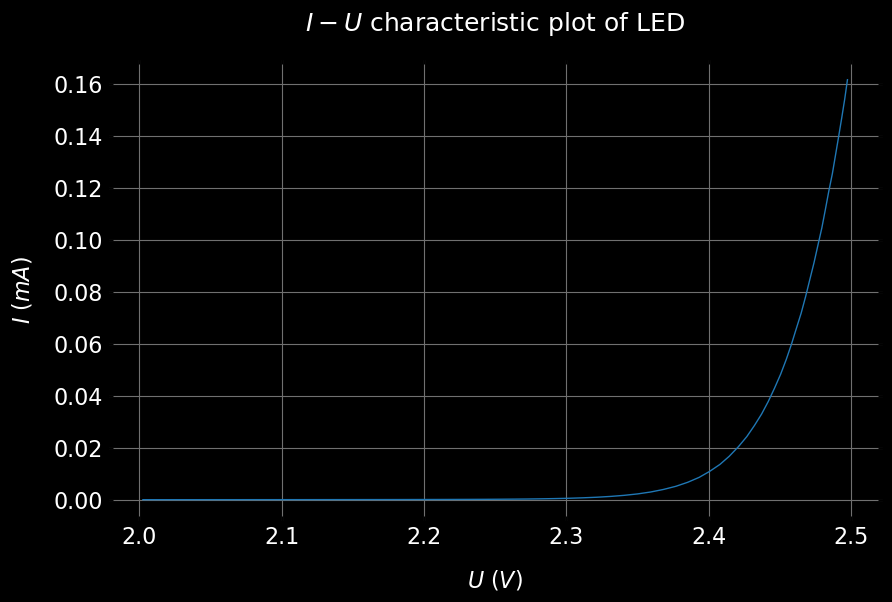

<IPython.core.display.Latex object>

In [5]:
for i in range(len(df_l)):
    plt.title(r"$I-U$ characteristic plot of %s " % (df_l_titles[i]))
    plt.xlabel('$U$ ($V$)')
    plt.ylabel('$I$ ($mA$)')
    plt.grid(True)
    plt.plot(df_l[i]['U (V)'], df_l[i]['I (A)']*1e3)
    plt.show()
    dy(Lx(r'$Figure\, 1.%d$: Current-voltage characteristics of %s.' % (2+i+1, df_l_titles[i])))


## Task 2

### Task 2.1 Si Diode

***Task Definition*** 

Determine the emission coefficient ($n$) by linear regression of the $\log(I)-U$ graph of the Si Diode.

***Theoretical Basis*** 

The current-voltage characteristic of an SI Diode is described by the Shockley Equation:

$$I = I_s \left(\exp\left({\frac{U}{nU_T}}\right) - 1 \right) \label{eq1.1} \tag{1.1}$$

- $n$: Emission Coefficient  
- $I_s$: Reverse-bias saturation current 

where: $$ U_T = \frac{k_BT}{e}$$

- $U_T$: Thermal Voltage
- $k_B$: Boltzmann Constant
- $T$: Absolute Temperature of the p-n junction ($298K$)
- $e$: Elementary charge

Under forward bias conditions: $$ U_T \ll U \implies \exp\left({\frac{U}{nU_T}}\right) \gg 1 $$

Hence Eq[1.1](#mjx-eqn-eq1.1) may be approximated as:

$$I = I_s \left(\exp\left(\frac{U}{nU_T}\right)\right)$$

$$ \ln(I) = \frac{U}{nU_T} + \ln(I_s) \label{eq1.2} \tag{1.2}$$ 

$$k := \frac{1}{n U_T}$$ 

- $k$: slope

$$n = \frac{1}{k U_T} \label{eq1.3} \tag{1.3}$$ 

Hence, the uncertainty in $n$ is given by:

$$\mu_n = \left|\frac{\partial n}{\partial k}\right|\mu_k = \left|\frac{1}{U_T k^2}\right|\mu_k$$

- $\mu_{k}$ : Uncertainty of k from linear fit.


***Procedure***

1. The measurements made using the Si-diode is used to plot a ln(I)-U graph which is then fitted to [Eq 1.2](#mjx-eqn-eq1.2) via linear regression.
</br>

2. Subsequently, the value of the slope $k$ is determined from the fit, and used to calculate $n$ using [Eq 1.3](#mjx-eqn-eq1.3). This value is then compared to the theoretical value of $n$ in literature. 
</br>

In [6]:
def fit_func(x_arg, k_arg, b_arg):
    return k_arg*x_arg + b_arg

def f1(U_arg, n_arg, I_s_arg):
    return I_s_arg*(np.exp(U_arg/n_arg/U_T)-1)

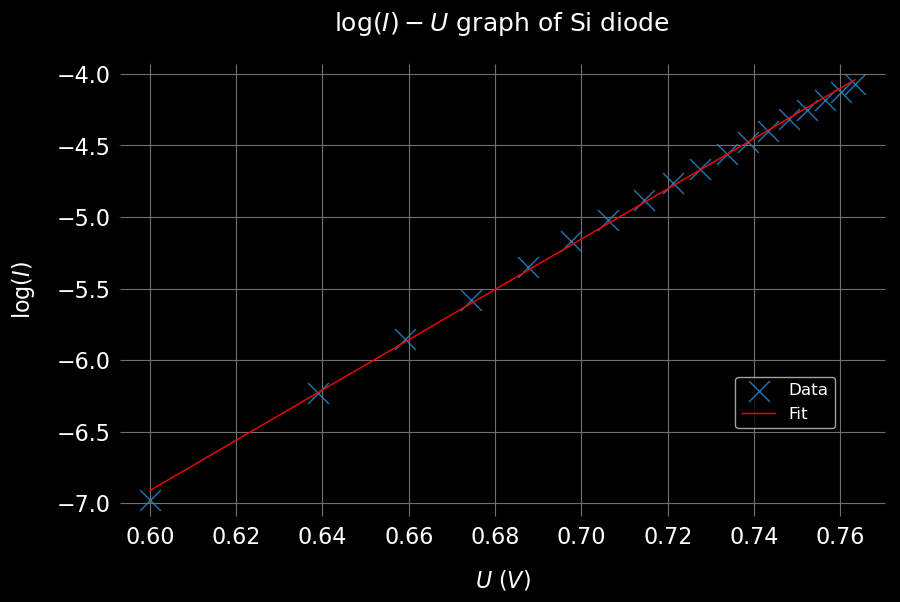

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
y = np.array(np.log(df_a['I (A)'][1:]))
x = np.array(df_a['U (V)'][1:])

fit = curve_fit(fit_func, x, y)
k = fit[0][0]
u_k = np.sqrt(fit[1][0][0])
I_s = np.exp(fit[0][1])
u_I_s = I_s * np.sqrt(fit[1][1][1])
n = 1/k/U_T
u_n = np.abs(n/k) * u_k

fit_x = np.linspace(np.min(x), np.max(x), 1000)
fit_y = np.log(f1(fit_x, n, I_s))
plt.title(r"$\log(I)-U$ graph of %s " % (df_l_titles[0]))
plt.xlabel('$U$ ($V$)')
plt.ylabel(r'$\log(I)$')
plt.grid(True)
plt.scatter(x, y, label='Data', marker='x')
plt.plot(fit_x, fit_y, label='Fit', color ='r')
plt.legend(loc=(0.8,0.2))
plt.show()
dy(Lx(r'$Figure\, 2.%d$: $log(I)-U$ linear fit of %s.' % (1, df_l_titles[0])))
dy(Lx(r'$$I_S = (%.2f \pm %.3f)~nA$$' % (I_s*1e9, u_I_s*1e9)))
dy(Lx(r'$$n = %.2f \pm %.3f$$' % (n, u_n)))



### Task 2.2 Zener Diode

***Task Definition*** 

Determine the breakdown voltage ($U_B$) as well as the direct current resistance ($R$) and the differential resistance $r_d$ for a current of $0.2I_{Zmax}$ in the reverse-biased direction.

***Theoretical Basis*** 

The breakdown voltage is referred to as the minimum voltage needed to cause the Zener Diode to begin conducting when placed in the reverse biased direction.

The value of $U_B$ corresponds to the point where $I=0$, and may be found by extrapolating the linear part of the $I(U)$ graph of a reverse biased Zener Diode. 

Furthermore, the values of $R$ and $r_d$ may be calculated using the following:

$$R= \frac{U}{I}$$

$$r_d = \frac{dU}{dI}$$

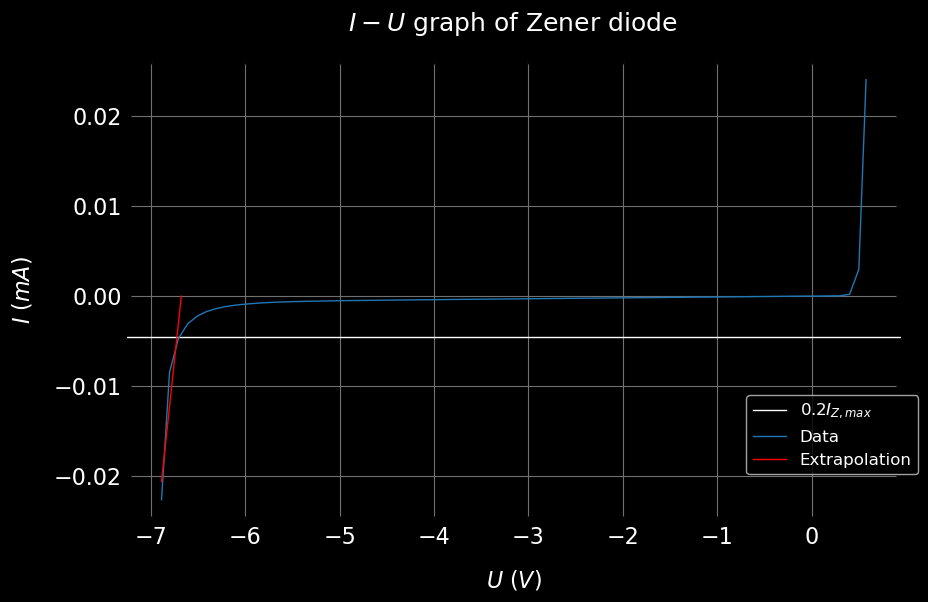

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
y = np.array(df_b['I (A)'][:3])
x = np.array(df_b['U (V)'][:3])
fit = curve_fit(fit_func, x, y)
k = fit[0][0]
u_k = np.sqrt(fit[1][0][0])
b = fit[0][1]
u_b = np.sqrt(fit[1][1][1])
V_b = -b/k
u_V_b = np.sqrt((V_b/k * u_k)**2 + (u_b/k)**2)
R = 1/k
u_R = np.abs(R/k*u_k)
I_max_02 = 0.2*df_b['I (A)'][0]
ind_max = df_b[df_b['I (A)'] > I_max_02].first_valid_index()
ind_min = ind_max - 1
dI = df_b['I (A)'][ind_max] - df_b['I (A)'][ind_min]
dU = df_b['U (V)'][ind_max] - df_b['U (V)'][ind_min]
r_d = dU/dI

fit_x = np.linspace(x[0], V_b, 100)
plt.title(r"$I-U$ graph of %s " % (df_l_titles[1]))
plt.xlabel('$U$ ($V$)')
plt.ylabel(r'$I$ ($mA$)')
plt.grid(True)
plt.axhline(I_max_02*1e3, label=r'$0.2I_{Z,max}$', color='white')
plt.plot(df_b['U (V)'],df_b['I (A)']*1e3, label='Data')
plt.plot(fit_x, fit_func(fit_x, k, b)*1e3, label='Extrapolation', color ='r')
plt.legend(loc=(0.8,0.1))
plt.show()
dy(Lx(r'$Figure\, 2.%d$: $I-U$ linear fit of %s.' % (2, df_l_titles[1])))
dy(Lx(r'$$U_B = (%.2f \pm %.3f)~V$$' % (V_b, u_V_b)))
dy(Lx(r'$$R = (%.2f \pm %.3f) ~k\Omega$$' % (R*1e-3, u_R*1e-3)))
dy(Lx(r'$$r_d = %.2f ~k\Omega$$' % (r_d*1e-3)))

***Analysis*** 

It is observed that both $U_B$ and $R$ have significantly large uncertainities, caused by the low sampling rate used during the experiment. 

This step was taken to minimize the runtime of the experiment and adhere to the time constraints. 

Hence, only a limited number of measurements were taken for the linear region of the reverse biased Zener diode which negatively affected the quality of the extrapolation. 



### Task 2.3 LED 

***Task Definition*** 

Determine the threshold voltage ($U_S$) by regression of the linear part of the current-voltage characteristic. From the threshold voltage estimate the average emitted wavelength and compare the result with your observations.

***Theoretical Basis*** 

The Threshold voltage $U_S$ is referred to as the minimum voltage needed to the LED to begin emitting light of wavelength $\lambda$.

The value of $U_S$ corresponds to the point where $I=0$, and may be found by performing linear regression on the linear part of an LED's $I(U)$ graph.

Subsequently, the average value of $\lambda$ may be calculated using:

$$ \lambda_{avg} = \frac{hc}{eU_S}$$

- $h$ : Planck's Constant
- $c$ : Speed of Light
- $e$ : Elementary Charge
- $U_S$ : Threshold Voltge

This value may be compared with $\lambda_{actual}$ as seen during the expriment.

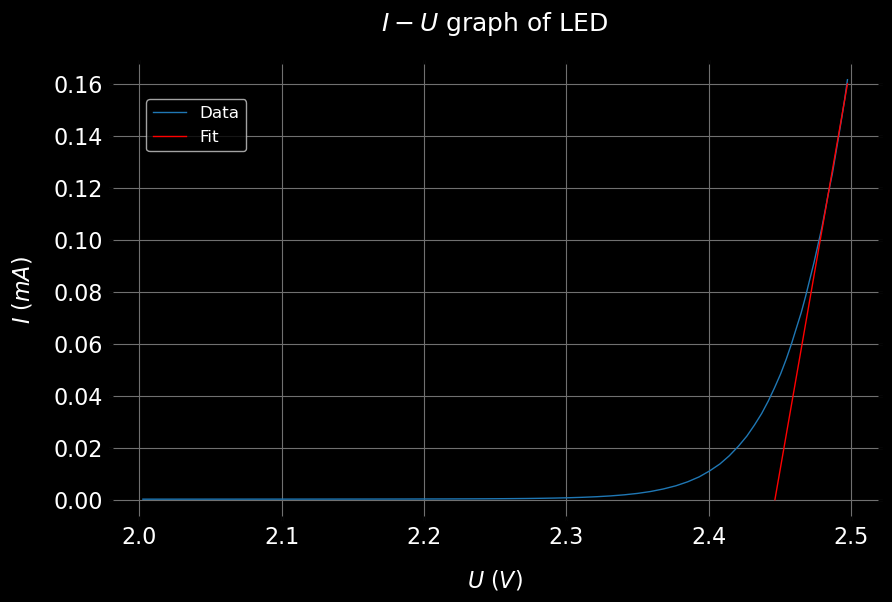

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:
y = np.array(df_c['I (A)'][-9:])
x = np.array(df_c['U (V)'][-9:])
fit = curve_fit(fit_func, x, y)
k = fit[0][0]
u_k = np.sqrt(fit[1][0][0])
b = fit[0][1]
u_b = np.sqrt(fit[1][1][1])
V_s = -b/k
u_V_s = np.sqrt((V_s/k * u_k)**2 + (u_b/k)**2)
Lambda = (h*c)/(e*V_s) 
u_L = np.abs(Lambda/V_s * u_V_s)
fit_x = np.linspace(V_s,x[-1], 100)
plt.title(r"$I-U$ graph of %s " % (df_l_titles[2]))
plt.xlabel('$U$ ($V$)')
plt.ylabel(r'$I$ ($mA$)')
plt.grid(True)
plt.plot(df_c['U (V)'],df_c['I (A)']*1e3, label='Data')
plt.plot(fit_x, fit_func(fit_x, k, b)*1e3, label='Fit', color ='r')
plt.legend(loc=(0.05,0.8))
plt.show()
dy(Lx(r'$Figure\, 2.%d$: $I-U$ linear extrapolation of %s.' % (3, df_l_titles[2])))
dy(Lx(r'$$U_S = (%.2f \pm %.3f)~V$$' % (V_s, u_V_s)))
dy(Lx(r'$$\lambda_{avg} = (%.2f \pm %.3f) ~ nm$$' % (Lambda*1e9, u_L*1e9)))

***Analysis*** 

The LED used during the experiment emitted blue light which corresponds to wavelength range of  $\lambda_{actual} : 450~nm - 495~nm$.

It is observed that the theoretical value of $\lambda$ lies within the expected range.

## Task3

### Measure Junction Capacitance as a function of Reverse Bias Voltage for Si Diode

***Task Definition*** 

Measure the depletion layer capacitance $C_s$ of an Si power diode as a function of the reverse bias DC voltage $U$ using a resonance technique. Thereafter, determine the thickness of the depletion layer $d_s$ for vanishing reverse bias voltage.

***Theoretical Basis*** 

The total capacitance $C_{tot}$ of the Si-power diode under resonance frequency conditions is given by:

$$ C_{tot} = C_G + C_s= \frac{1}{L \left(2 \pi f_r\right)^2} \label{eq3.1} \tag{2.1}$$ 


- $f_r$ : Resonance Frequency of the Circuit
- $C_G$ : Parallel to the depletion-layer Capacitance
- $L = 220 ~mH$

The values of $f_r$ are found by analyzing the Lissajous figure on an oscilloscope connected to the circuit. 

Varying the value of the DC voltage $U$ across the circuit causes the value of $f_r$ to change. 

This allows for a graph of $C_{tot}$ against $U$ to be plotted, and fitted to the following given equation:

$$ C_{tot} = C_G + C_0 \sqrt\frac{U_D}{U_D-U} \label{eq2.2} \tag{2.2}$$ 

- $C_0$ : Capacitance for vanishing U (U $\approx$ 0)

Subsequently, the values of $C_0$ and $U_D$ may be determined from the fit, and used to calculate $C_s(U)$.

The formula for $C_s(U)$ is obtained by comparing [Eq 2.1](#mjx-eqn-eq2.1) and [Eq 2.2](#mjx-eqn-eq2.2):

$$C_s(U)= C_0 \sqrt\frac{U_D}{U_D-U} \label{eq2.3} \tag{2.3}$$ 
 
Thereafter, a graph of $C_s(U)$ may be plotted. 

Finally, the values of $d_s$ may be computed via the given formula:

$$ d_s = \frac{\epsilon_r\epsilon_0 A}{C_s(U)} \label{eq2.4} \tag{2.4}$$ 

- $A = 25 mm^2$
- Relative permittivity of Si: $\epsilon_r  = 11.8$
- Permittivity of the free space: $\epsilon_0 = 8.85418782 \cdot 10^{-12} {F}{m}^{-1}$

***Procedure***

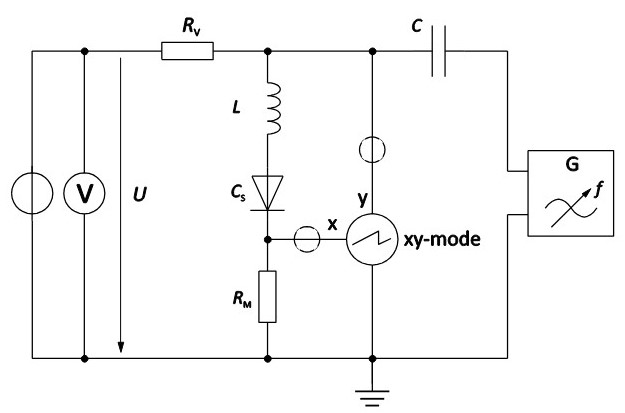

<IPython.core.display.Latex object>

In [10]:
dy(Im("./img/T3.jpg", height=100, width=800))
dy(Lx(r'$Figure\, 3.1$: Circuit for determing $C_{s}$ via resonance technique'))

1. The circuit was set up following the circuit diagram **Fig 3.1**.
<br>

2. A small A.C voltage of frequency $f$ is generated and supplied to the circuit by the signal generator. The A.C voltage must always be smaller than the applied D.C voltage $U$.
<br>

3. A D.C voltage $U$ is applied to the circuit.
<br>

4. The value of $f$ is varied until a 45&deg; line is observed on the oscilloscope. This means that the resonant frequency $f_r$ has been reached for the given value of $U$.
<br>

5. Vary $U$ and observe that the Lissajous figure on the oscilloscope changes. Hence, the value of $f$ must be varied again to find the correspodning value of $f_r$. 
<br>

6. Repeat the above steps and for 15 measurements of $U$ and $f_r$.
<br>

7. Plot a graph of $C_{tot}(U)$ using [Eq 2.1](#mjx-eqn-eq2.1), then fit this graph to [Eq 2.2](#mjx-eqn-eq2.2) and determine the parameters $C_0$ and $U_D$ from the fit.
<br>

8. Compute the value of $d_0$ using [Eq 2.4](#mjx-eqn-eq2.4).
<br>

9. Plot a graph of $d_S(U)$ using [Eq 2.4](#mjx-eqn-eq2.3).

In [11]:
def C_tot_f(U_arg,C_g_arg, C_0_arg,U_D_arg):
    return C_g_arg + C_0_arg*np.sqrt(U_D_arg/(U_D_arg-U_arg))

def U_f(x,C_0_arg,U_D_arg):
    return U_D_arg*(1-(C_0_arg**2/x**2))

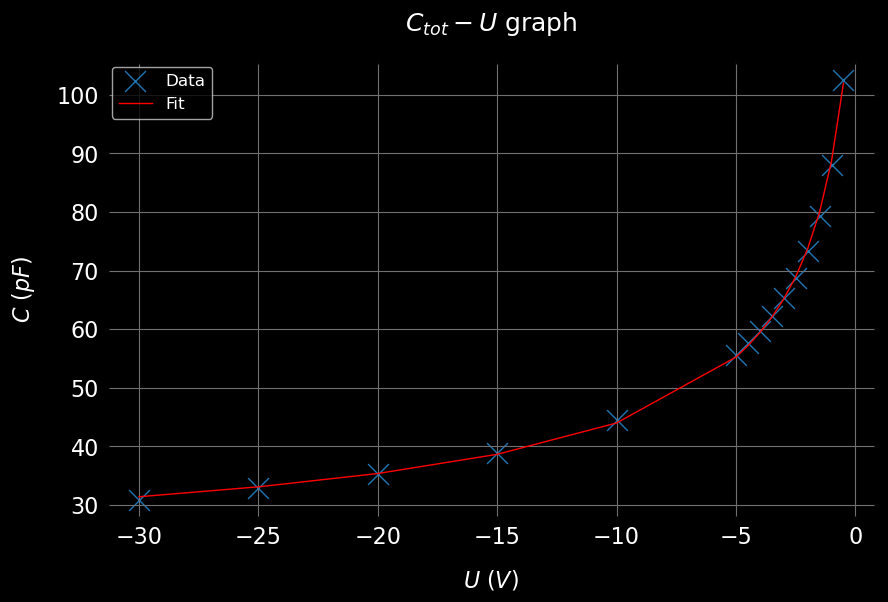

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [12]:
df=pd.read_csv('./data/task3.csv', dtype=np.float64)
C_tot = 1/L/(2*np.pi*1e3*np.array(df['f_r/KHz'][::-1]))**2
U = -1*np.array(df['U/V'][::-1])
fit = curve_fit(C_tot_f, U, C_tot)
C_g = fit[0][0]
C_0 = fit[0][1]
U_D = fit[0][2]
u_C_g = np.sqrt(fit[1][0][0])
u_C_0 = np.sqrt(fit[1][1][1])
u_U_D = np.sqrt(fit[1][2][2])

plt.title(r"$C_{tot}-U$ graph")
plt.xlabel('$U$ ($V$)')
plt.ylabel(r'$C$ ($pF$)')
plt.grid(True)
plt.scatter(U,1e12*C_tot, label='Data', marker="x")
plt.plot(U, 1e12*C_tot_f(U, C_g,C_0, U_D), label='Fit', color = 'r')
plt.legend()
plt.show()
dy(Lx(r'$Figure\, 3.2$: $C_{tot}-U$ fit.'))
dy(Lx(r'$$C_g = (%.2f \pm %.3f)~pF$$' % (C_g*1e12, u_C_g*1e12)))
dy(Lx(r'$$C_0 = (%.2f \pm %.3f)~pF$$' % (C_0*1e12, u_C_0*1e12)))
dy(Lx(r'$$U_D = (%.2f \pm %.3f)~V$$' % (U_D, u_U_D)))

<IPython.core.display.Latex object>

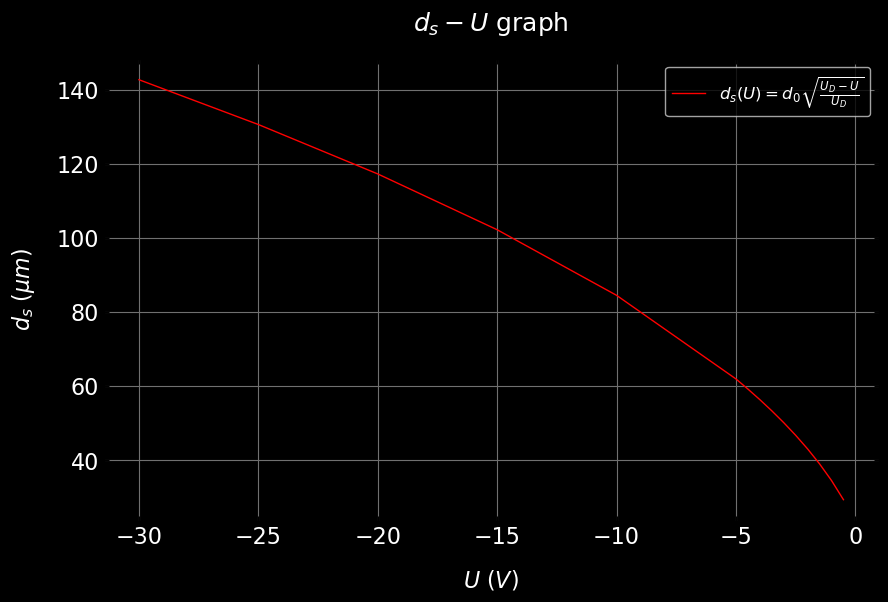

<IPython.core.display.Latex object>

In [13]:
d_0 = eps_r*eps_0*A/C_0
u_d_0 = d_0/C_0 * u_C_0
dy(Lx(r'$$d_0 = \frac{\epsilon_r\epsilon_0 A}{C_0} = (%.2f \pm %.3f)~\mu m$$' % (d_0*1e6, u_d_0*1e6)))

d_s = d_0 * np.sqrt((U_D - U)/U_D)
plt.title(r"$d_s-U$ graph")
plt.xlabel('$U$ ($V$)')
plt.ylabel(r'$d_s$ ($\mu m$)')
plt.grid(True)
plt.plot(U, 1e6*d_s, color = 'r', label=(r'$d_s(U) = d_0\sqrt{\frac{U_D-U}{U_D}}$'))
plt.legend()
plt.show()
dy(Lx(r'$Figure\, 3.3$: $d_s-U$ plot.'))

***Analysis*** 

TODO

## References

1) [E14e Lab instruction](https://moodle2.uni-leipzig.de/pluginfile.php/3621565/mod_resource/content/1/E14e_2024.pdf)